Data shows that 2.1 million people were affected by Breast Cancer in 2015.Breast cancer is a deadly disease if not detected early.The accuracy of breast cancer detection is around 79% if done by Physician.But if we use machine learning we can have a accuracy of around 97 %.Our aim in this kernel will be to see what level of accuracy we can reach in predicting Breast cancer.Kernel will cover topics like 

1.Importing and Understading Data 

2.Data Vizualization 

3.Feature Engineering 

4.Model Built 

5.Feature Selection using Random Forest 

6.Conclusion 


# 1.Importing and Understanding Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
import warnings
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Summary of Dataset

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 569
Columns  : 33

Features :
     : ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Missing values    : 569

Unique values :  
 id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean    

### Missing Values

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Luckily we dont have missing values in the dataset.We need to drop the Column Unnamed: 32 from the dataset

In [6]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [7]:
df.shape

(569, 31)

### Value Counts

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We can see that the data set is unbalanced.We need to balance this for improving results.

In [9]:
#df.info()

In [10]:
df.diagnosis = df.diagnosis.astype('category')

Now we have converted Column on diagnosis from object to category.

# 2.Data Vizualization

### Heat Map 

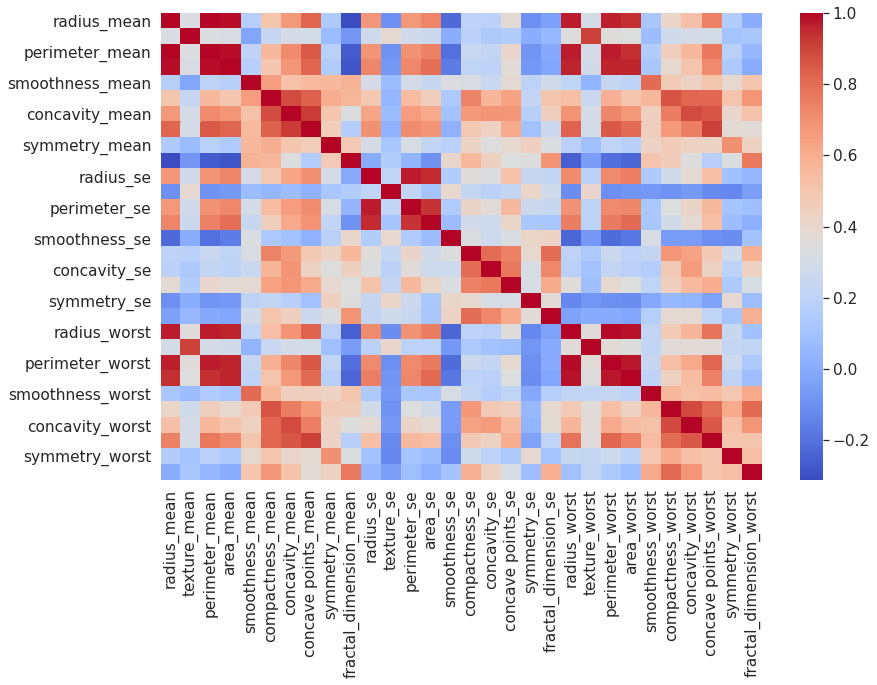

In [11]:
plt.rcParams['figure.figsize']=(12,8)
sns.set(font_scale=1.4)
sns.heatmap(df.drop('diagnosis',axis=1).corr(),cmap='coolwarm')
#sns.heatmap(df.drop('diagnosis',axis=1).drop('id',axis=1).corr(),cmap='coolwarm')
pass

### Box Plot and Outlier Detection 

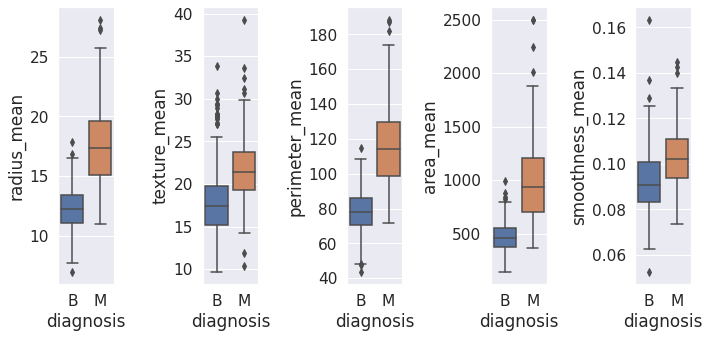

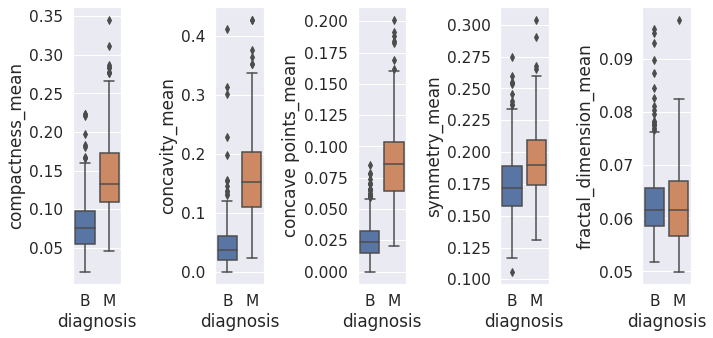

In [12]:
plt.rcParams['figure.figsize']=(10,5)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()

From the box plots we can see that Malignant tumor has overall higher values of features.

Looking at the points outside box plots we can say there are outliers in the dataset.But a case like breast cancer outliers may have significant effect on the outcome of tumor being Benign or Malignant tumor.

### Facet Grid 

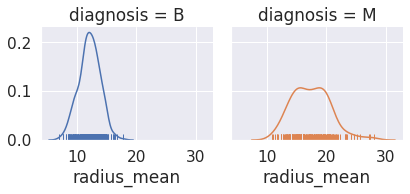

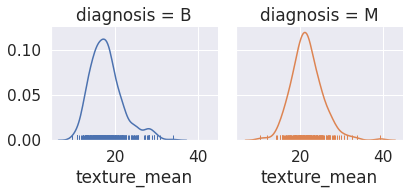

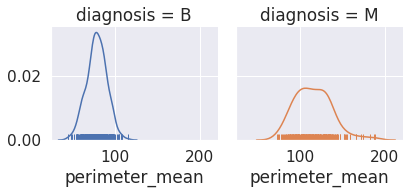

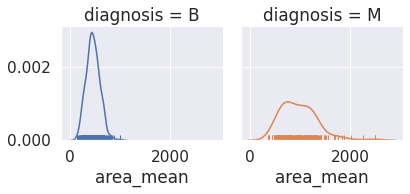

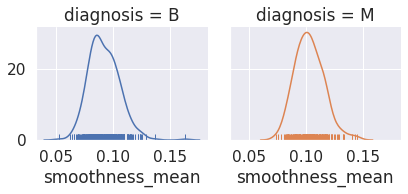

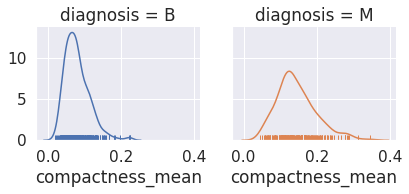

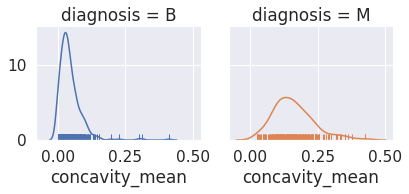

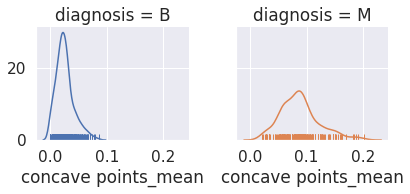

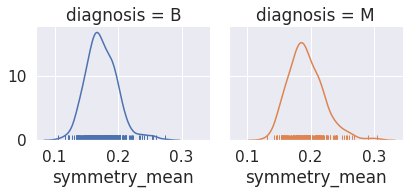

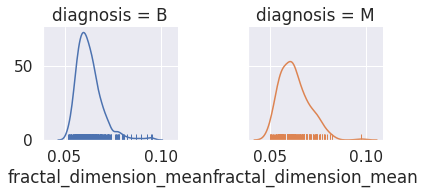

In [13]:
g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'radius_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'texture_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'perimeter_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'area_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'smoothness_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'compactness_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'concavity_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'concave points_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'symmetry_mean',hist=False,rug=True)

g = sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'fractal_dimension_mean',hist=False,rug=True)

pass

From the above plots we can see that most of the features are close to normal distribution.If the features are not normally distributed then we we can use some transformation to make them normally distributed.In this case we will not be applying any transformation the features.

# 3.Feature Engineering 

### Creating Matrics of Features

In [14]:
X = df.drop(labels='diagnosis',axis=1)
y = df['diagnosis']
col=X.columns
#col

In [15]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values so we need to do the data imputation part.

### Normalization and Feature Scaling 

In [16]:
df_norm = (X-X.mean())/(X.max()-X.min())
df_norm = pd.concat([df_norm,y],axis=1)

In [17]:
df_norm.head(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,0.335139,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,-0.129057,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,-0.059132,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,0.729621,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M


We can see that now the the features are well scaled and should be good for our ML Model.

In [18]:
X_norm = df_norm.drop(labels='diagnosis',axis=1)
Y_norm = df_norm['diagnosis']
col=X_norm.columns
#le = LabelEncoder()
#le.fit(Y_norm)
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
Y_norm= le.fit_transform(Y_norm)
Y_norm = pd.DataFrame(Y_norm)
#Y_norm.head()

### Train Test Split

In [19]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,Y_norm,test_size=0.2,random_state= 10)

# 4.Model Built 

In [20]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test,pred)
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n',cm)


### SVC

In [21]:
param = {
           'C':[0.1,1,100,1000],
           'gamma':[0.0001,0.001,0.005,0.1,1,3,5],
           
         }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s


[1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 1, 'gamma': 1}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy Score :0.9736842105263158
Confusion Matrix : 
 [[72  3]
 [ 0 39]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.0s finished


### Random Forest

In [22]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
        
         }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'max_depth': 5, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score :0.9736842105263158
Confusion Matrix : 
 [[73  2]
 [ 1 38]]


### XGBoost

In [23]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
           'learning_rate':np.arange(0.01,0.1,0.01).tolist()
         }
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.2min finished


[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'learning_rate': 0.060000000000000005, 'max_depth': 3, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy Score :0.9649122807017544
Confusion Matrix : 
 [[72  3]
 [ 1 38]]


 # 5.Feature Importance using Random Forest

In [24]:
np.random.seed()
forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(X_train,y_train)
accuracy = fit.score(X_test,y_test)
predict = fit.predict(X_test)
cmatrix = confusion_matrix(y_test,predict)

#-------------------------------------------------------------------------------------------------#
# Perform k Fold cross- validation 

print('Accuracy of Random Forest: %s'% "{0:.2%}".format(accuracy))

Accuracy of Random Forest: 98.25%


In [25]:
# Feature importance 
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking")
for f in range(X.shape[1]):
    print("Feature %s (%f)" % (list(X)[f],importances[indices[f]]))

Feature ranking
Feature radius_mean (0.126908)
Feature texture_mean (0.123001)
Feature perimeter_mean (0.115731)
Feature area_mean (0.112222)
Feature smoothness_mean (0.094083)
Feature compactness_mean (0.067084)
Feature concavity_mean (0.048929)
Feature concave points_mean (0.047601)
Feature symmetry_mean (0.040602)
Feature fractal_dimension_mean (0.037740)
Feature radius_se (0.028345)
Feature texture_se (0.017331)
Feature perimeter_se (0.016060)
Feature area_se (0.015169)
Feature smoothness_se (0.014315)
Feature compactness_se (0.012964)
Feature concavity_se (0.011685)
Feature concave points_se (0.010426)
Feature symmetry_se (0.007492)
Feature fractal_dimension_se (0.007190)
Feature radius_worst (0.007095)
Feature texture_worst (0.005056)
Feature perimeter_worst (0.004490)
Feature area_worst (0.004455)
Feature smoothness_worst (0.004353)
Feature compactness_worst (0.004307)
Feature concavity_worst (0.004249)
Feature concave points_worst (0.003995)
Feature symmetry_worst (0.003943)
Fe

We can see that radius_mean has the highest influence on predicting cancer.

[Text(0.5, 0, 'Gini Importance')]

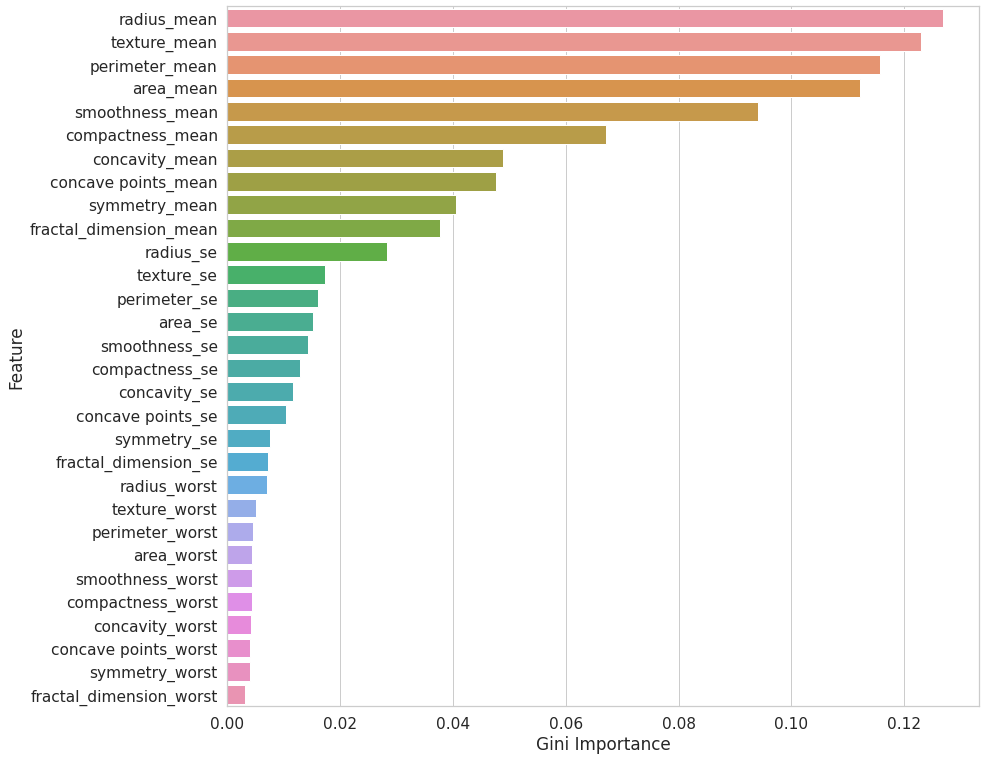

In [26]:
feat_imp = pd.DataFrame({'Feature':list(X),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
sns.set_style('whitegrid')
ax = sns.barplot(x='Gini importance',y='Feature',data=feat_imp)
ax.set(xlabel='Gini Importance')

# 6.Balancing DataSet

We will be oversampling using Smote

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res , Y_res = sm.fit_resample(X_norm,Y_norm)
#pd.Series(Y_res).value_counts()

In [28]:
#from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_res,Y_res,test_size=0.2,random_state= 10)

### Random Forest

In [29]:
def FitModel_1(X_train_1,y_train_1,X_test_1,y_test_1,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train_1,y_train_1)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test_1)
    cm = confusion_matrix(y_test_1,pred)
    print(pred)
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test_1,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test_1,pred)))
    print('Confusion Matrix : \n',cm)

In [30]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
        
         }
FitModel(X_train_1,y_train_1,X_test_1,y_test_1,'Random Forest Balanced',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'max_depth': 7, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score :0.986013986013986
Confusion Matrix : 
 [[66  2]
 [ 0 75]]


We can see that by over sampling accuracy of our model has improved from 98.3% to 98.6%. For critical projects like detecting cancer such small increase in Accuaracy is also very important.

### Building Model Using Feature Importance from Random Forest Result

In [31]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[1:15].index
type(feat_to_keep),feat_to_keep

(pandas.core.indexes.base.Index,
 Index(['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean',
        'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
        'perimeter_se', 'area_se', 'smoothness_se'],
       dtype='object', name='Feature'))

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res , Y_res = sm.fit_resample(X_norm[feat_to_keep],Y_norm)
#pd.Series(Y_res).value_counts()

In [33]:
#from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_res,Y_res,test_size=0.2,random_state= 10)

In [34]:
def FitModel_2(X_train_2,y_train_2,X_test_2,y_test_2,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train_2,y_train_2)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test_2)
    cm = confusion_matrix(y_test_2,pred)
    print(pred)
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test_2,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test_2,pred)))
    print('Confusion Matrix : \n',cm)

In [35]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
        
         }
FitModel(X_train_2,y_train_2,X_test_2,y_test_2,'Random Forest FS',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.4min finished


[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'max_depth': 6, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98        68
           1       0.96      1.00      0.98        75

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy Score :0.9790209790209791
Confusion Matrix : 
 [[65  3]
 [ 0 75]]


# Reloading Saved Model 

In [36]:
loaded_model = pickle.load(open("Random Forest Balanced","rb"))

In [37]:
pred1 = loaded_model.predict(X_test)
loaded_model.best_params_

{'max_depth': 7, 'n_estimators': 1000}

# Conclusion

In this Kernel we have done data cleaning,feature engineering, balanced the dataset.Out observation is that with SVM,Random Forest and XGBoost we were able to get an accuracy more than 96% which would be more than what a physicain would be able to acheive.

Out of SVM,Random Forest and XGBoost we got highest accuracy with Random Forest.

We did feature selection using Random Forest.Then fitted model with top 15 features.But our accuracy slightly reduced.This tells us that all the features are important for predicting breast cancer accurately.

We had a unbalanced dataset.So we did oversampling using SMOTE.Oversampling helped us to slighlt improve the accuracy of the model.

Technique to Pickle the model and to reload the pickled model is shared.